<h1> Reinforcement Learning Course </h1>

Welcome to the first practical section of the Reinforcement Learning course ! 

The objective of this notebook is twofold :
* The first part will help you further understand the basics of RL with a Learning by Doing approach. The equations have already been written, you will play around with the different parameters to grasp the extent of their effects on your agent's learning phase.
* Same approach for the second part, but we will focus more on strategies that a Q-Learning agent can use to navigate through his environment faster and more efficiently

Make sure you are using Python 3.5 or a more recent version

<h3> The OpenAI Gym Library (~2mins)</h3>

We will be working with Gym. It's an open-source library that provides coded and ready to use environments for Reinforcement Learning, the goal is to be able to quickly prototype RL algorithms and not waste time creating environments from scratch. 

<b> The Basics </b>

Gym also takes care of the interaction between your agent and the environment :
* Each environment is an instance of a coded class called : environment
* This class contains methods for taking random actions or actions based on custom strategies
* Theses methods automaticly handles the updating of states and rewards, <b> you don't have to worry about testing the environment itself, just the algorithm </b>

All the reinforcement learning equations and tools needed are in the following .py file.

In [1]:
import gym
import time

%matplotlib inline

from reinforcement_learning import (
    train_agent,
    plot_performance_info,
    print_frames,
)

<h1> Part I : Hands-on Q-Learning </h1>

Hearing about Q-Learning is one thing, seeing your own trained agent in action is another !

<h3> Taxi Game (~5mins)</h3>

You will be training an agent to play and win a game called Taxi, available in the Gym library

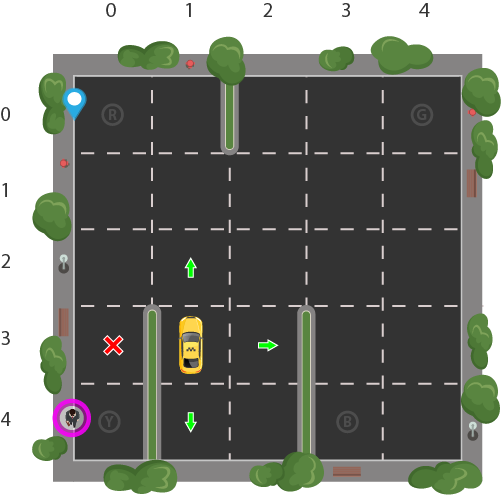


<b> The Rules of the Game </b>

After a long day of work a person calls a smart taxi to pick him up and take him home, that smart taxi will be your agent ! Thus, your goal is to find and transport the person to his home as fast as possible.

You will notice 4 particular states in the 5x5 grid : R, Y, B and G.
For each round, the person to pick up and the goal will randomly appear in one of these 4 spots.
So, the environment changes over time and the agent will have to adapt to it !
The taxi can take 6 possible actions : 
* Going north
* Going south
* Going east
* Going west
* Pick up a person
* Drop a person

The agent gets a +20 reward for dropping a client at the right place, however he gets a -1 reward for each action he takes (Living Penalty) and gets a -10 reward if he tries to pick-up or drop off a client at the wrong place.

<b> Generating the environment </b>

Let's get started shall we ?

In [2]:
environment = gym.make("Taxi-v3").env

In [3]:
environment.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



The pink colored letter corresponds to the location of the person to pick up while the blue one correspond to the person's destination.

So, the two most basic questions we must ask ourselves are : 
* How many states do we have ?
* How many actions can we take in the state ?

In [4]:
print("Action Space : {}".format(environment.action_space))
print("State Space : {}".format(environment.observation_space))

Action Space : Discrete(6)
State Space : Discrete(500)


With no surprises, the taxi can take 6 possible actions and so the size of the action space is 6. 

The state space is of size 500 because there is 500 possible configurations for the environment :
* 5 squares per row
* 5 rows
* 4 possible locations for the person's home
* 5 possible locations for the person (the 4 locations where he appears or inside the taxi)


And so 5 x 5 x 5 x 4 = 500

Our Q-table will then be of size 500 x 6

<h3> Questions </h3>

For all questions you will have 3 functions at your disposal :
* train_agent : The main function, it uses Q-learning to train the agent to win the game, given the parameters of the algorithm
* plot_information : For each execution of the previous function, you can plot the <b> number of steps per episode </b>, the <b> average reward per episode </b>, the <b> total reward per episode </b> and the <b> duration of an episode. </b>. These will help you with your interpretations
* <b> OPTIONAL </b> : print_frames : this will simulate some episodes of the game to show "in real-time" the learning process of the agent, <b> It won't be necessary to run this function to answer the questions </b>

<b> Recommendations : </b>
* We recommend for most questions to test the values 0 & 1 as well as a value in between to better grasp the meaning of the parameters
* Some parameter choices can make the learning very slow, don't hesitate to interupt the training, justifying the long training time can be an answer to a question

As a reminder, below are the equations used for Q-Learning

* The Bellman Equation to <b> calculate q-values :</b> 
$
\
\begin{equation}
Q(s,a) = R(s,a) + \gamma \sum_{s'}^{S'}P(s'/s,a) \max_{a'}(Q(s',a'))
\end{equation}
$
* The Temporal Difference learning equation to <b> update q-values :</b>  $
\
\begin{equation}
Q_{updated}(s,a) = Q_{old}(s,a) - \alpha (R(s,a) + \gamma \sum_{s'}^{S'}P(s'/s,a) \max_{a'}(Q(s',a')) - Q_{old}(s,a))
\end{equation}
$

<b> IMPORTANT : </b> For the first two questions, there will be no stochasticity !

<b> Question 1 : (~5mins) </b> We will first see how the discount factor $\gamma$ affects the efficiency of the learning process.

Run the two following cells by testing the value 0 and a value above 1 for $\gamma$. All other parameters will remain fixed, <b> What do you notice in these two cases? Provide an interpretation for the results with $\gamma$ = 0 </b>

<b> Hint: </b> It won't be necessary to provide an interpretation for the results of  $\gamma$ >= 1, but if you are curious and done with other questions, think about how the behaviour of the sum $R(s,a) + \gamma \sum_{s'}^{S'}P(s'/s,a) \max_{a'}(Q(s',a'))$ 

In [5]:
training_start_time = time.time()
q_table_post_training, training_frames, number_steps_per_episode, average_reward_per_episode, maximum_q_value_per_episode \
, total_reward_per_episode, episodes_durations = \
train_agent(environment, gamma = 0.9)
training_stop_time = time.time()
print("Training Time : ", training_stop_time - training_start_time)

Episode : 0
Exploration Factor : 1
Learning Rate : 0.75
Episode : 70
Exploration Factor : 1
Learning Rate : 0.75
Episode : 140
Exploration Factor : 1
Learning Rate : 0.75
Episode : 210
Exploration Factor : 1
Learning Rate : 0.75
Episode : 280
Exploration Factor : 1
Learning Rate : 0.75
Episode : 350
Exploration Factor : 1
Learning Rate : 0.75
Episode : 420
Exploration Factor : 1
Learning Rate : 0.75
Episode : 490
Exploration Factor : 1
Learning Rate : 0.75
Episode : 560
Exploration Factor : 1
Learning Rate : 0.75
Episode : 630
Exploration Factor : 1
Learning Rate : 0.75
Training finished.

Training Time :  0.9014401435852051


/Users/zakariabouayyad/OneDrive - Capgemini/Everything Data Science Related/Taf/X-HEC/reinforcement_learning.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f1.show()
/Users/zakariabouayyad/OneDrive - Capgemini/Everything Data Science Related/Taf/X-HEC/reinforcement_learning.py:69: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f2.show()
/Users/zakariabouayyad/OneDrive - Capgemini/Everything Data Science Related/Taf/X-HEC/reinforcement_learning.py:84: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f3.show()
/Users/zakariabouayyad/OneDrive - Capgemini/Everything Data Science Related/Taf/X-HEC/reinforcement_learning.py:99: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline,

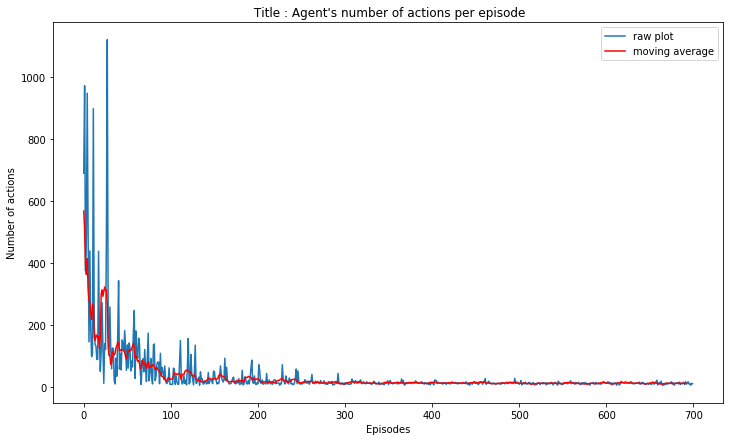

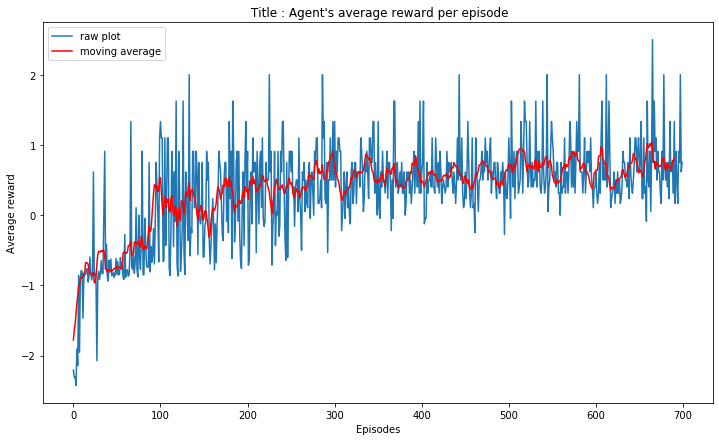

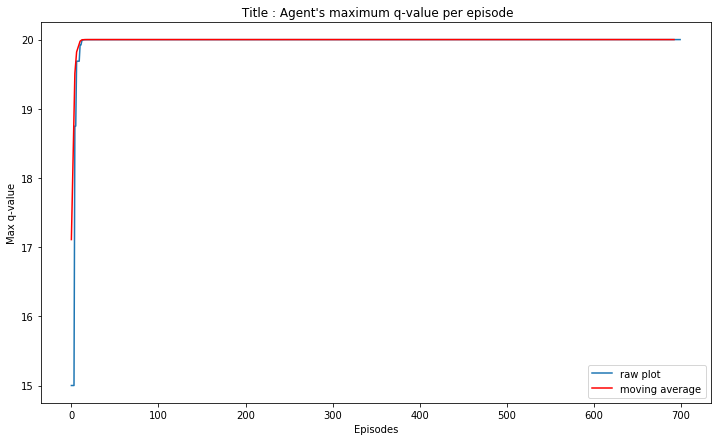

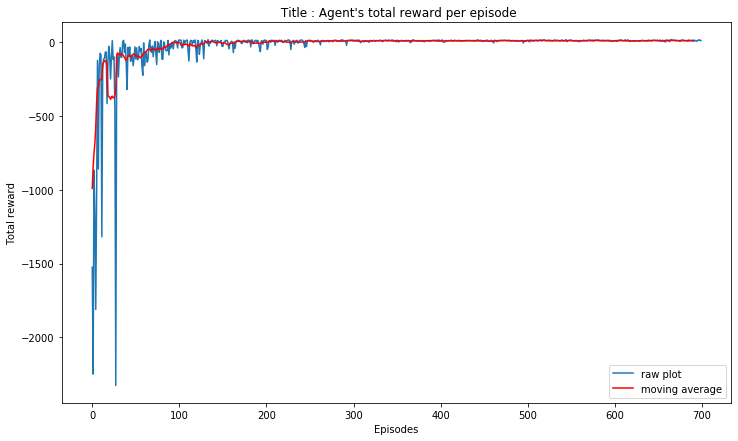

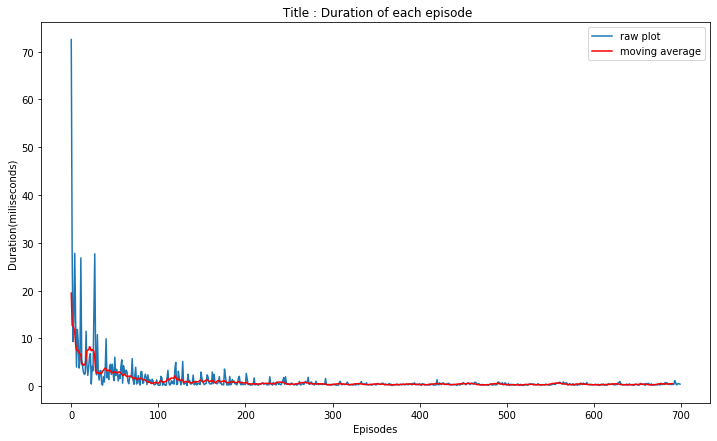

In [6]:
plot_performance_info(number_steps_per_episode, average_reward_per_episode, maximum_q_value_per_episode, total_reward_per_episode,
                      episodes_durations, q_table_post_training)

If you wish to see the learning process run this cell, <b> don't hesitate to interrupt it, it takes a while for an agent to win an episode at the beginning of the learning process </b>

In [7]:
print_frames(training_frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Episode: 697
Number Actions: 6
State: 479
Action: 5
Action Reward: 20
Total Reward: 14


<b> Question 2 (~5mins) : </b> Moving on to the learning rate $\alpha$, <b> what happens when $\alpha$ = 0? Why doesn't the choice of $\alpha$ = 1 seem to affect the agent so much? </b>  

<b> Hint: </b> For $\alpha$ = 1, don't forget that for now there is no stochasticity

In [8]:
training_start_time = time.time()
q_table_post_training, training_frames, number_steps_per_episode, average_reward_per_episode, maximum_q_value_per_episode \
, total_reward_per_episode, episodes_durations = \
train_agent(environment, alpha = 0.5)
training_stop_time = time.time()
print("Training Time : ", training_stop_time - training_start_time)

Episode : 0
Exploration Factor : 1
Learning Rate : 0.5
Episode : 70
Exploration Factor : 1
Learning Rate : 0.5
Episode : 140
Exploration Factor : 1
Learning Rate : 0.5
Episode : 210
Exploration Factor : 1
Learning Rate : 0.5
Episode : 280
Exploration Factor : 1
Learning Rate : 0.5
Episode : 350
Exploration Factor : 1
Learning Rate : 0.5
Episode : 420
Exploration Factor : 1
Learning Rate : 0.5
Episode : 490
Exploration Factor : 1
Learning Rate : 0.5
Episode : 560
Exploration Factor : 1
Learning Rate : 0.5
Episode : 630
Exploration Factor : 1
Learning Rate : 0.5
Training finished.

Training Time :  0.8798079490661621


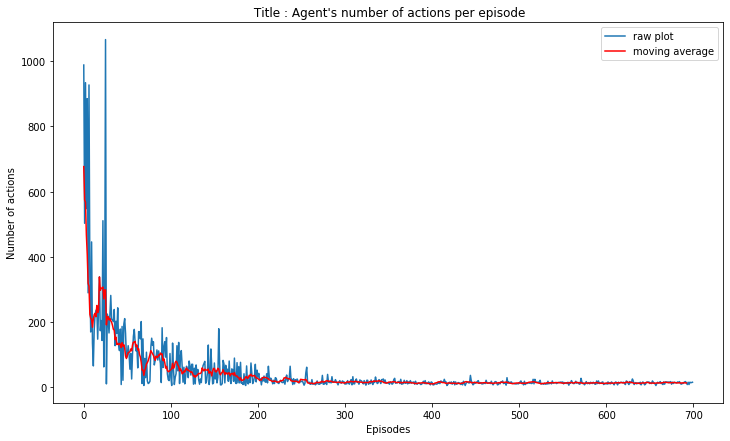

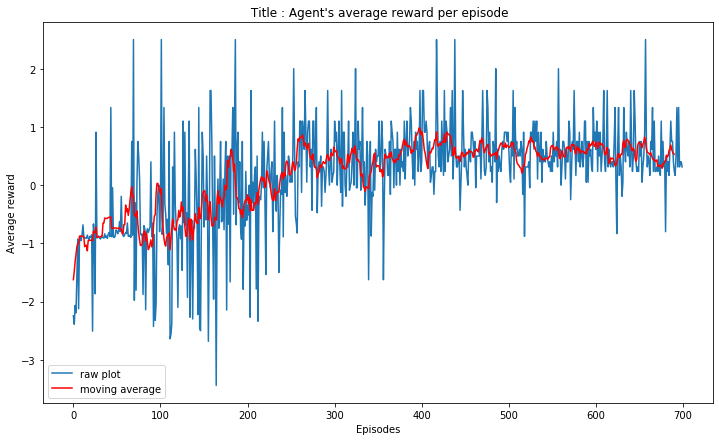

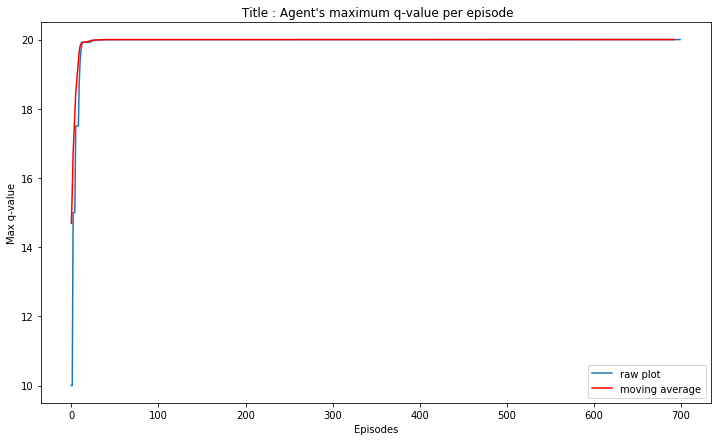

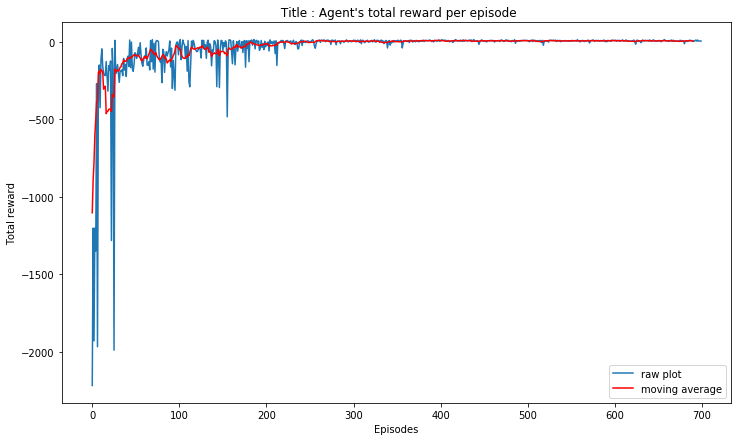

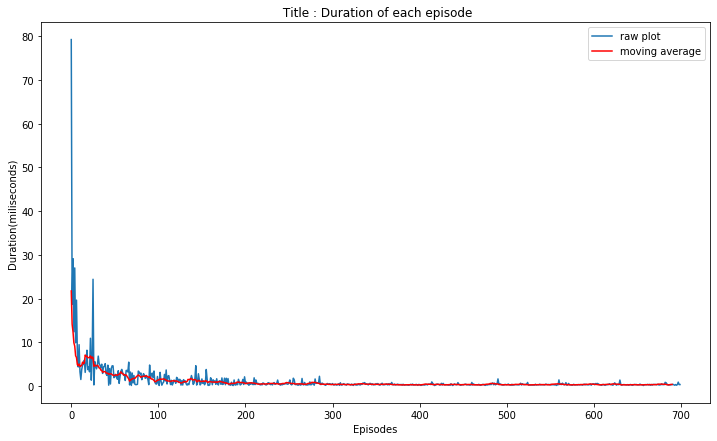

In [9]:
plot_performance_info(number_steps_per_episode, average_reward_per_episode, maximum_q_value_per_episode,
                      total_reward_per_episode, episodes_durations, q_table_post_training)

In [10]:
print_frames(training_frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Episode: 697
Number Actions: 14
State: 479
Action: 5
Action Reward: 20
Total Reward: 6


<h3> Adding Stochasticity : Exploration vs Eploitation (~10 mins) </h3>

In the course, we've only considered one form of stochasticity : The environment forces the agent to take another action than the one he has chosen.

Here however, we will introduce another very common type stochasticity: by using an <b> exploration factor </b>. Let's call it $\epsilon$

If we take for example $\epsilon$ = 0.8, the main idea is that :
* The agent will have a 0.8 (or $\epsilon$) probability of performing what he thinks is the best action in the state he is in.
* The agent will have an 0.2 (or 1 - $\epsilon$) probability of <b> deliberatly choosing a different action than what he thinks is the best one </b>. In this case the choice of the different action is random

In other words, the agent forces himself to <b> explore </b> the environment in order to understand it better and avoid getting stuck in local minima, rather than <b> exploiting </b> the q-values he has to take the best action.  

This strategy is called  <b> $\epsilon$-greedy </b>. The word greed is used because in one of the two cases the agent will make the action that he thinks will give him the best reward, which is assignable to greed. When $\epsilon$ = 1 (Which is the case for question 1 & 2) the strategy is called <b> pure greedy </b>

It's not obvious to tell how often an agent should <b> explore </b> the environment versus how often he should <b> exploit </b> the q-values he already has, it depends on the problem and on how you calibrate $\epsilon$ 

<b> Question 3: What happens when $\epsilon$ = 0?</b> Test other values of $\epsilon$, <b> what are your interpretations? </b>

In [11]:
training_start_time = time.time()
q_table_post_training, training_frames, number_steps_per_episode, average_reward_per_episode, maximum_q_value_per_episode \
, total_reward_per_episode, episodes_durations = \
train_agent(environment, exploration_factor = 0.1, number_episodes = 400)
training_stop_time = time.time()
print("Training Time : ", training_stop_time - training_start_time)

Episode : 0
Exploration Factor : 0.1
Learning Rate : 0.75
Episode : 40
Exploration Factor : 0.1
Learning Rate : 0.75
Episode : 80
Exploration Factor : 0.1
Learning Rate : 0.75
Episode : 120
Exploration Factor : 0.1
Learning Rate : 0.75
Episode : 160
Exploration Factor : 0.1
Learning Rate : 0.75
Episode : 200
Exploration Factor : 0.1
Learning Rate : 0.75
Episode : 240
Exploration Factor : 0.1
Learning Rate : 0.75
Episode : 280
Exploration Factor : 0.1
Learning Rate : 0.75
Episode : 320
Exploration Factor : 0.1
Learning Rate : 0.75
Episode : 360
Exploration Factor : 0.1
Learning Rate : 0.75
Training finished.

Training Time :  4.617981910705566


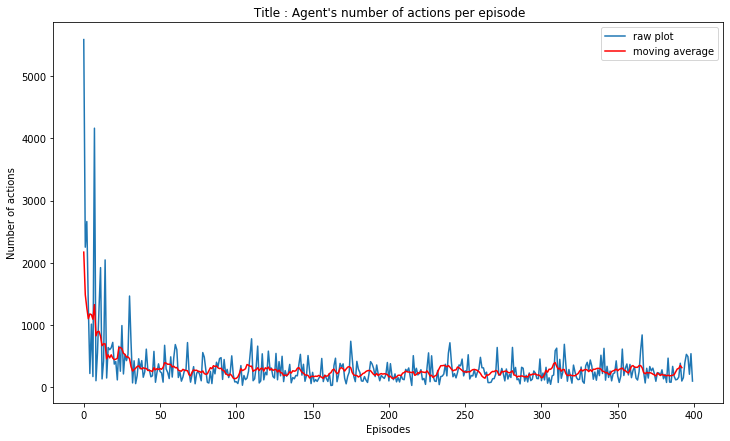

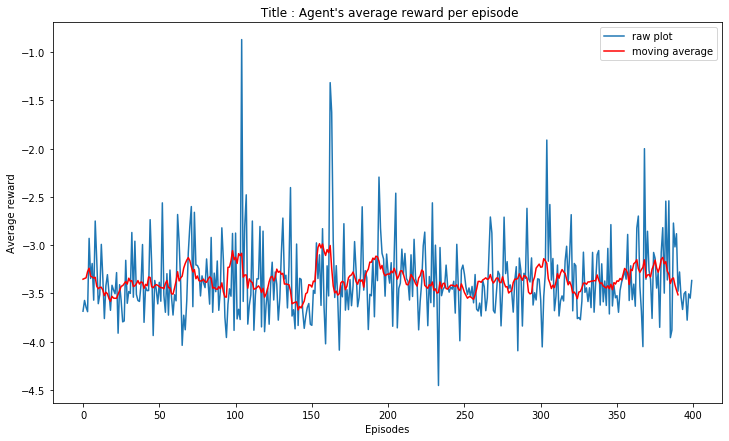

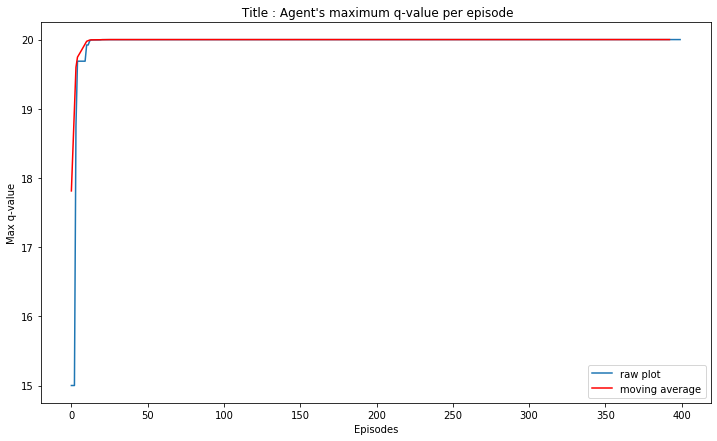

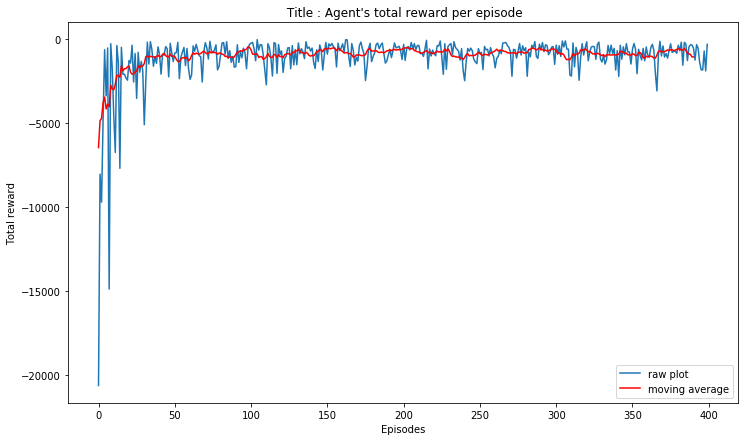

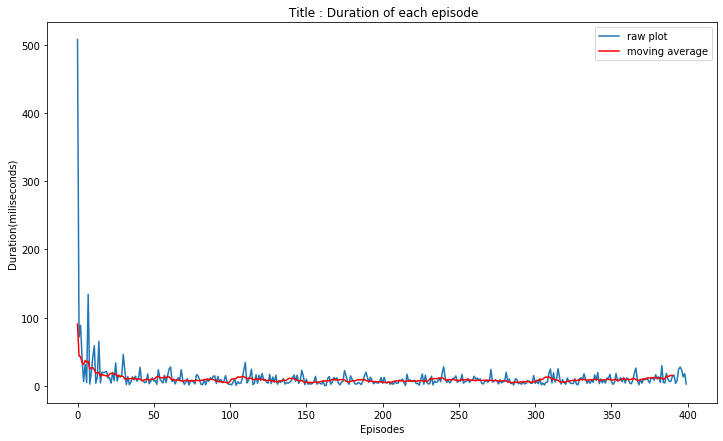

In [12]:
plot_performance_info(number_steps_per_episode, average_reward_per_episode, maximum_q_value_per_episode, 
                      total_reward_per_episode, episodes_durations, q_table_post_training)

In [13]:
print_frames(training_frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Episode: 397
Number Actions: 199
State: 479
Action: 5
Action Reward: 20
Total Reward: -701


<h1> Part II : Decaying Parameters & Exploration Strategies </h1>

In Reinfocement Learning, it's not always relevant to keep the same parameter values all along the training process. For example, let's say we chose $\epsilon$ = 0.4 to force the agent to explore the environment. Once the agent knows the environment very well, there's no use in keeping the exploration factor so high. 

It is common practice in Q-Learning to introduce a <b> decay </b> (or increase) of the parameters at the end of <b> every episode </b>. By decrementing (or incrementing) the values of the parameters, the agent will change his way of dealing with the environment as he evolves in it.

<b> Question 1 : (~5mins) </b> Which is the most appropriate strategy? :
* To start with a high value of $\alpha$ then decrease it
* To start with a low value of $\alpha$ then increase it

To better illustrate the answer, use the parameter choices : $\alpha$ = 0.9, decay = $10^{-3}$ then $\alpha$ = 0.1, decay = $-10^{-3}$


In [14]:
training_start_time = time.time()
q_table_post_training, training_frames, number_steps_per_episode, average_reward_per_episode \
, maximum_q_value_per_episode , total_reward_per_episode, episodes_durations = \
train_agent(environment, alpha = 0.9, learning_decay = 10**-3)
training_stop_time = time.time()
print("Training Time : ", training_stop_time - training_start_time)

Episode : 0
Exploration Factor : 1
Learning Rate : 0.9
Episode : 70
Exploration Factor : 1
Learning Rate : 0.83
Episode : 140
Exploration Factor : 1
Learning Rate : 0.7599999999999999
Episode : 210
Exploration Factor : 1
Learning Rate : 0.6899999999999998
Episode : 280
Exploration Factor : 1
Learning Rate : 0.6199999999999998
Episode : 350
Exploration Factor : 1
Learning Rate : 0.5499999999999997
Episode : 420
Exploration Factor : 1
Learning Rate : 0.47999999999999965
Episode : 490
Exploration Factor : 1
Learning Rate : 0.4099999999999996
Episode : 560
Exploration Factor : 1
Learning Rate : 0.3399999999999995
Episode : 630
Exploration Factor : 1
Learning Rate : 0.26999999999999946
Training finished.

Training Time :  0.7377426624298096


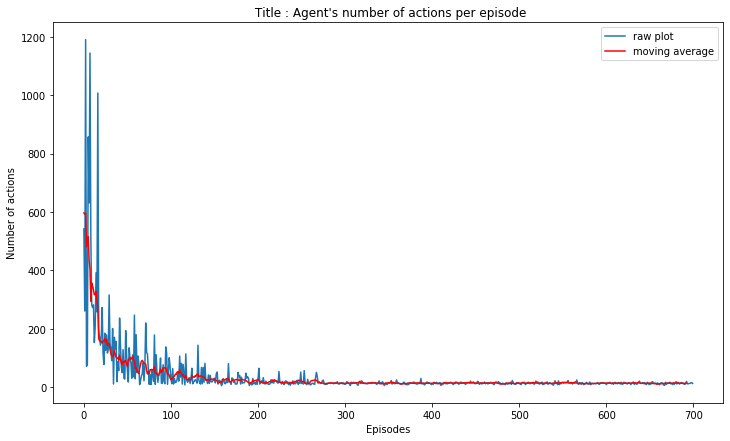

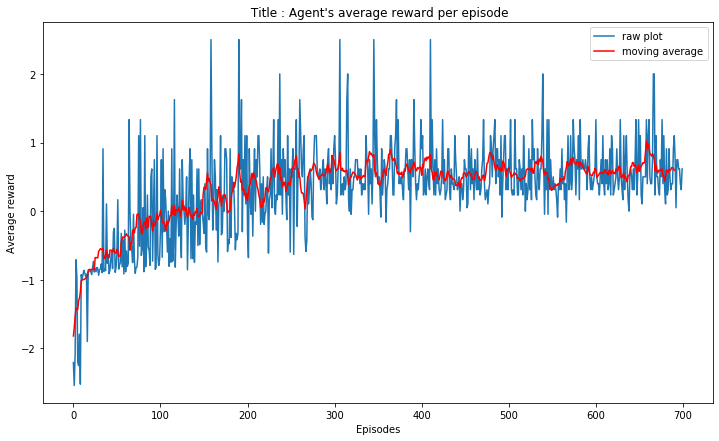

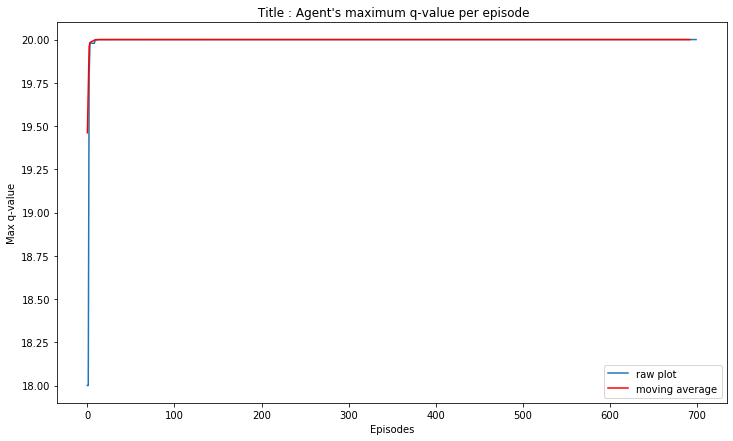

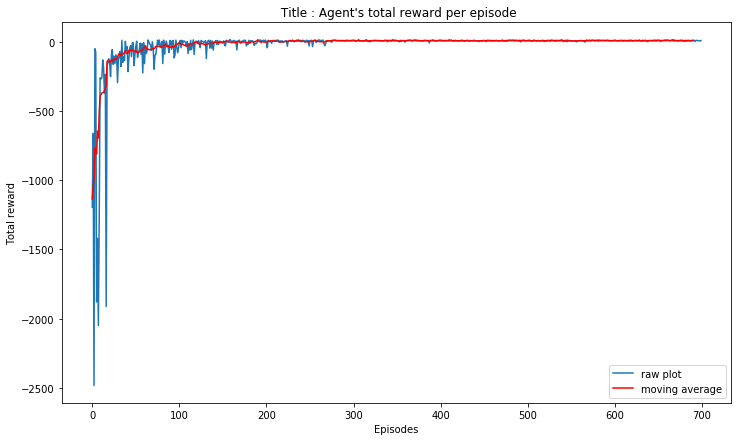

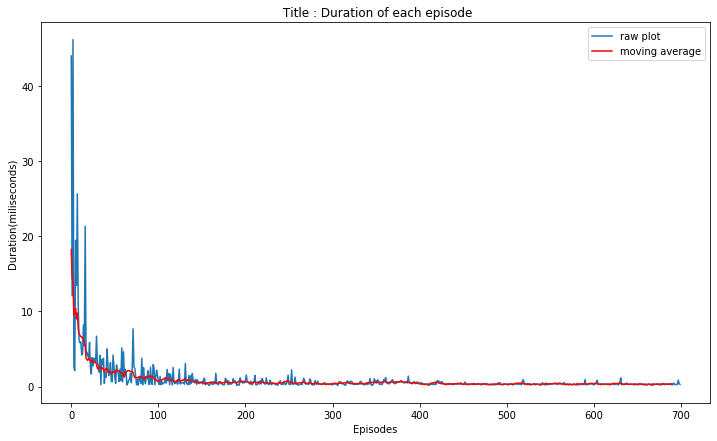

In [15]:
plot_performance_info(number_steps_per_episode, average_reward_per_episode, maximum_q_value_per_episode,
                      total_reward_per_episode, episodes_durations, q_table_post_training)

In [16]:
print_frames(training_frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Episode: 697
Number Actions: 14
State: 479
Action: 5
Action Reward: 20
Total Reward: 6


<b> Question 2 : (~5 mins) </b> Same question for the exploration factor $\epsilon$

In [17]:
training_start_time = time.time()
q_table_post_training, training_frames, number_steps_per_episode, average_reward_per_episode \
, maximum_q_value_per_episode, total_reward_per_episode, episodes_durations = \
train_agent(environment, exploration_factor = 0.9, exploration_decay = 10**-3)
training_stop_time = time.time()
print("Training Time : ", training_stop_time - training_start_time)

Episode : 0
Exploration Factor : 0.9
Learning Rate : 0.75
Episode : 70
Exploration Factor : 0.83
Learning Rate : 0.75
Episode : 140
Exploration Factor : 0.7599999999999999
Learning Rate : 0.75
Episode : 210
Exploration Factor : 0.6899999999999998
Learning Rate : 0.75
Episode : 280
Exploration Factor : 0.6199999999999998
Learning Rate : 0.75
Episode : 350
Exploration Factor : 0.5499999999999997
Learning Rate : 0.75
Episode : 420
Exploration Factor : 0.47999999999999965
Learning Rate : 0.75
Episode : 490
Exploration Factor : 0.4099999999999996
Learning Rate : 0.75
Episode : 560
Exploration Factor : 0.3399999999999995
Learning Rate : 0.75
Episode : 630
Exploration Factor : 0.26999999999999946
Learning Rate : 0.75
Training finished.

Training Time :  1.3510327339172363


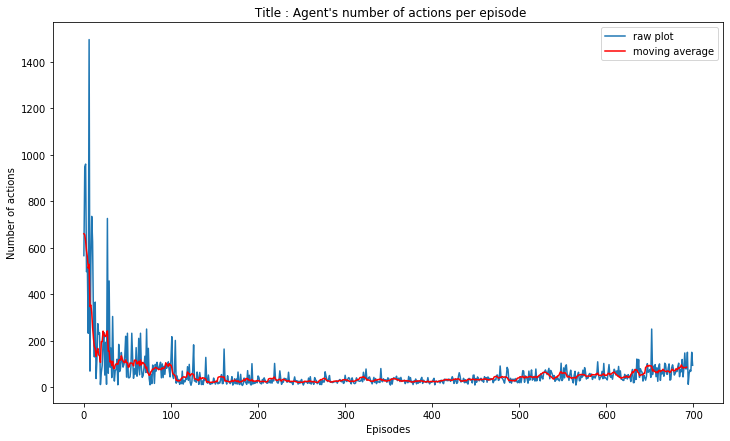

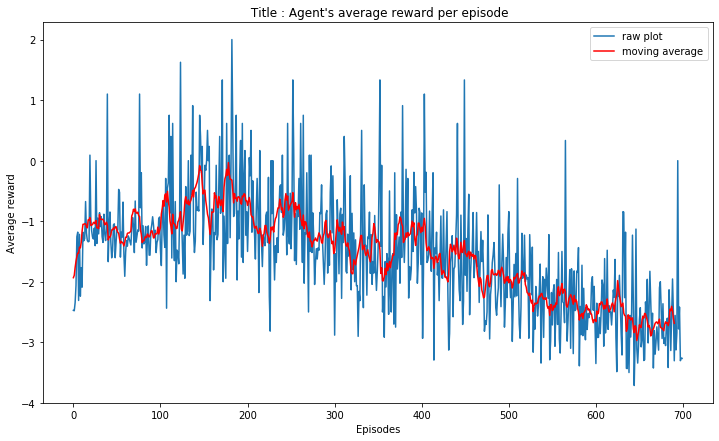

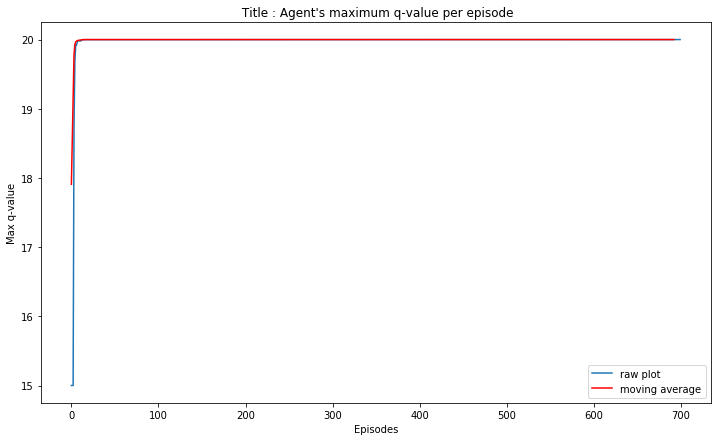

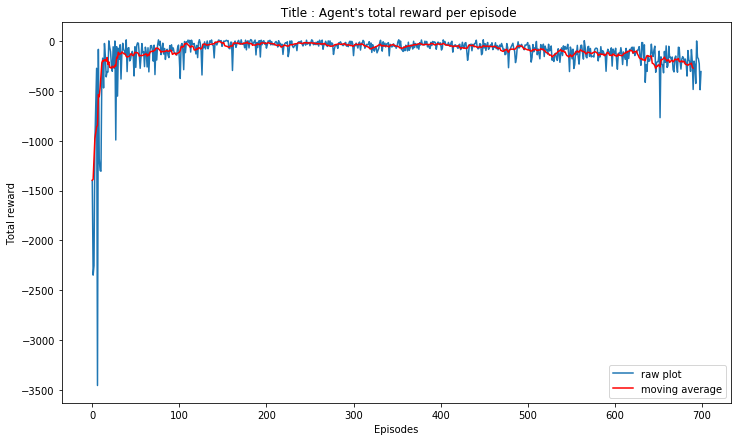

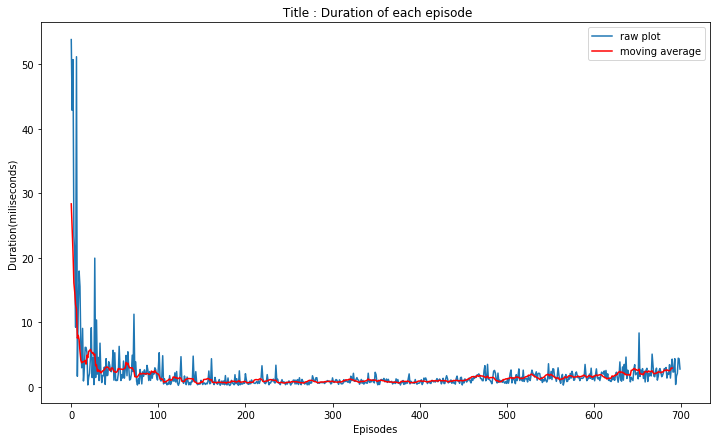

In [18]:
plot_performance_info(number_steps_per_episode, average_reward_per_episode, maximum_q_value_per_episode,
                      total_reward_per_episode, episodes_durations, q_table_post_training)

<h3> Softmax (Boltzmann) Exploration Strategy </h3>

<b> Explanation : (~5 mins) </b>

We've seen $\epsilon$-greedy as an exploration strategy, which is the most famous one. But there are many other strategies in the litterature, among which softmax exploration.

Softmax shares $\epsilon$-greedy's idea of not always taking the best (greedy) decision by inviting the agent to explore. But softmax does this in another way.

The taxi has 6 possible actions. For each action, we will compute a probability for the agent of taking that action. We will have 6 probabilities, which will be calculated in such a way that the current best action will get the highest probability and the current worst action will get the lowest one.

Then the agent randomly chooses one of the 6 actions, but not following a uniformly-distributed law like before. Instead we will be using the distribution of the 6 probabilities we have calculated. 

Since the current best action has the best probabilty, it will be chosen often, since that's exactly how a distribution works, this case corresponds to <b> exploitation </b>. However, because it's still a random draw, the agent can still end up choosing a different action than the current best one, which corresponds to <b> exploration </b>.

The equation representing the probability of an action is a softmax function of it's associated q-value


$ \Large
\
\begin{equation}
P(a_{i}/s) = \frac{e^{q(s,a_{i})/T}}{\sum_{j=1}^{k}e^{q(s,a_{j})/T}}
\end{equation}
$

Where $a_{i}$ is one of the k possible actions in te state s and T is a parameter called the temperature, which you will be calibrating.

<b> Question 3  (~5mins): </b> What strategy do we end up with when T is close to 0 ? Same question when T is close to $+\infty$ ? Which of the two cases corresponds to exploitation of the q-values rather than exploration ? Test your answers by calibrating the temperature with a positive value

In [19]:
training_start_time = time.time()
q_table_post_training, training_frames, number_steps_per_episode, average_reward_per_episode \
, maximum_q_value_per_episode, total_reward_per_episode, episodes_durations = \
train_agent(environment, strategy = "softmax", exploration_factor = 0.2)
training_stop_time = time.time()
print("Training Time : ", training_stop_time - training_start_time)

Episode : 0
Exploration Factor : 0.2
Learning Rate : 0.75
Episode : 70
Exploration Factor : 0.2
Learning Rate : 0.75
Episode : 140
Exploration Factor : 0.2
Learning Rate : 0.75
Episode : 210
Exploration Factor : 0.2
Learning Rate : 0.75
Episode : 280
Exploration Factor : 0.2
Learning Rate : 0.75
Episode : 350
Exploration Factor : 0.2
Learning Rate : 0.75
Episode : 420
Exploration Factor : 0.2
Learning Rate : 0.75
Episode : 490
Exploration Factor : 0.2
Learning Rate : 0.75
Episode : 560
Exploration Factor : 0.2
Learning Rate : 0.75
Episode : 630
Exploration Factor : 0.2
Learning Rate : 0.75
Training finished.

Training Time :  2.0092060565948486


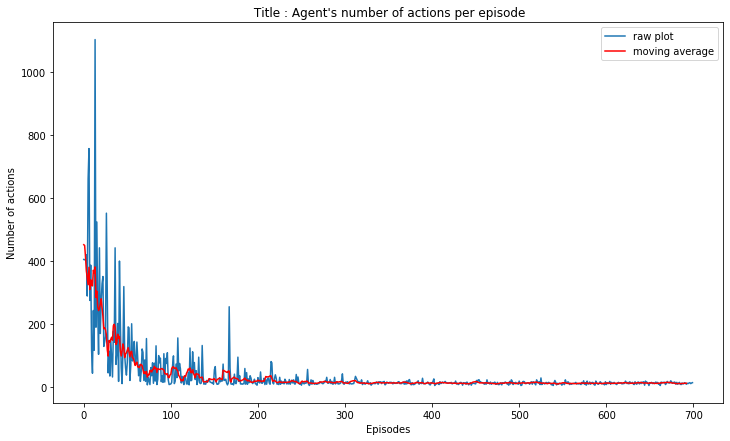

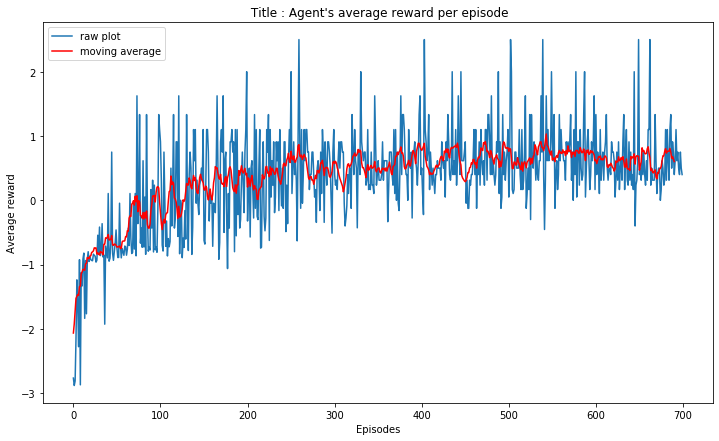

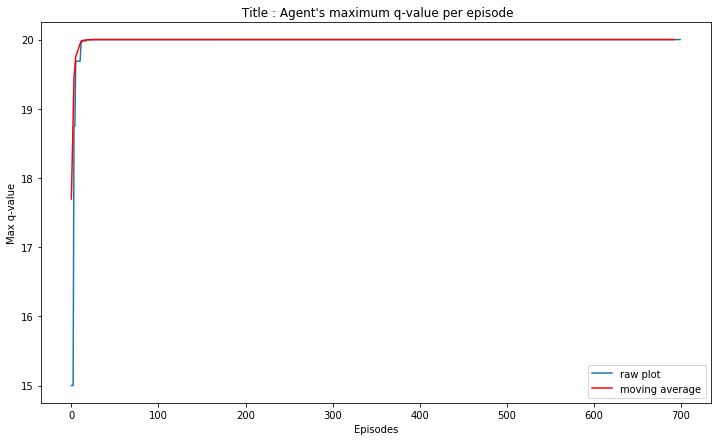

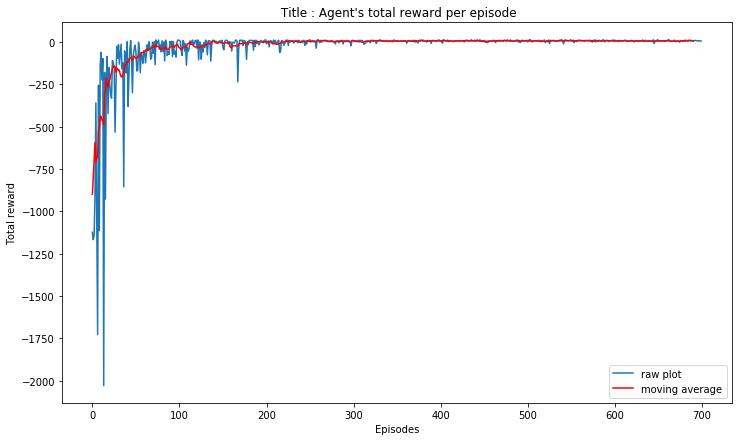

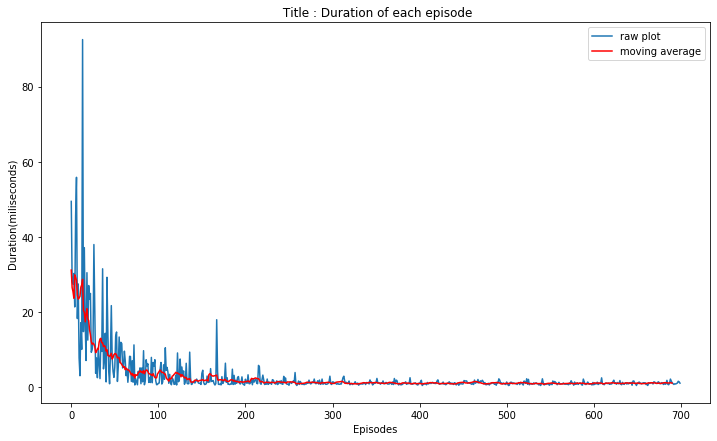

In [20]:
plot_performance_info(number_steps_per_episode, average_reward_per_episode,
                      maximum_q_value_per_episode, total_reward_per_episode, episodes_durations,
                      q_table_post_training)

In [21]:
print_frames(training_frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Episode: 697
Number Actions: 11
State: 16
Action: 5
Action Reward: 20
Total Reward: 9


<b> Question 4 :(~5 mins) </b> Based on your answer to the previous question, which is the most appropriate strategy :
* To increase the value of T over time ?
* To decrease the value of T over time ?

Test different decay (or negative decays to act as increments) in the code below

In [22]:
training_start_time = time.time()

q_table_post_training, training_frames, number_steps_per_episode, average_reward_per_episode \
,maximum_q_value_per_episode, total_reward_per_episode, episodes_durations = \
train_agent(environment, strategy = "softmax", exploration_factor = 0.6, exploration_decay = 0.0001) 
training_stop_time = time.time()
print("Training Time : ", training_stop_time - training_start_time)

Episode : 0
Exploration Factor : 0.6
Learning Rate : 0.75
Episode : 70
Exploration Factor : 0.5930000000000007
Learning Rate : 0.75
Episode : 140
Exploration Factor : 0.5860000000000015
Learning Rate : 0.75
Episode : 210
Exploration Factor : 0.5790000000000023
Learning Rate : 0.75
Episode : 280
Exploration Factor : 0.5720000000000031
Learning Rate : 0.75
Episode : 350
Exploration Factor : 0.5650000000000038
Learning Rate : 0.75
Episode : 420
Exploration Factor : 0.5580000000000046
Learning Rate : 0.75
Episode : 490
Exploration Factor : 0.5510000000000054
Learning Rate : 0.75
Episode : 560
Exploration Factor : 0.5440000000000061
Learning Rate : 0.75
Episode : 630
Exploration Factor : 0.5370000000000069
Learning Rate : 0.75
Training finished.

Training Time :  2.779719114303589


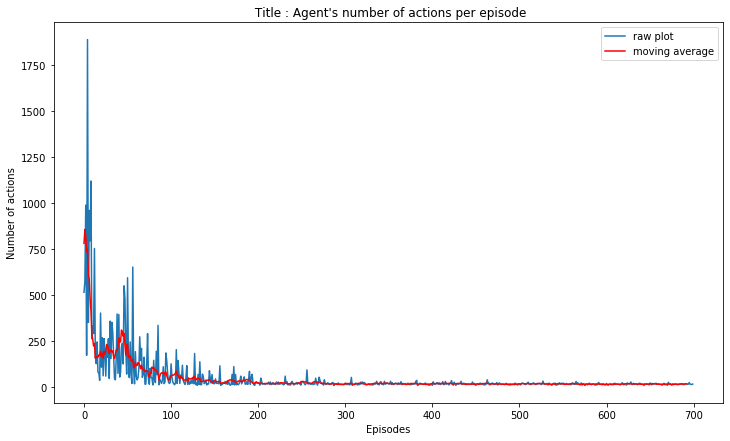

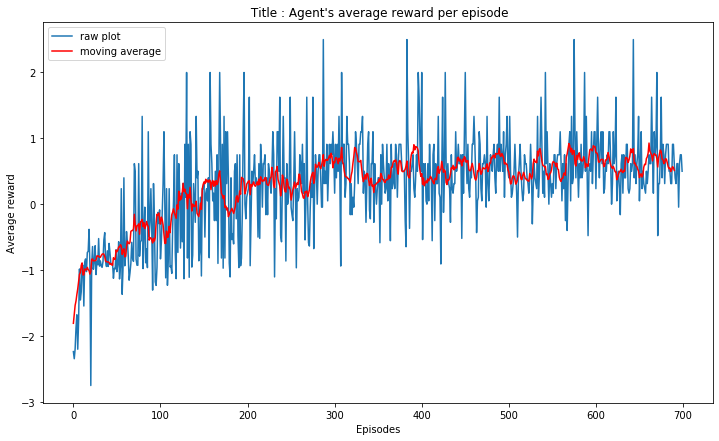

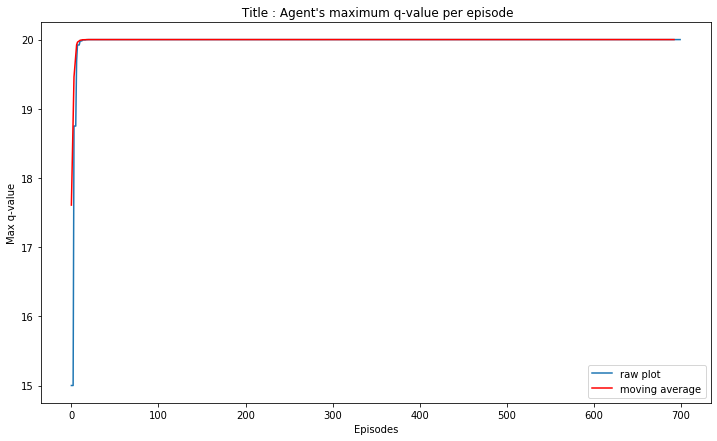

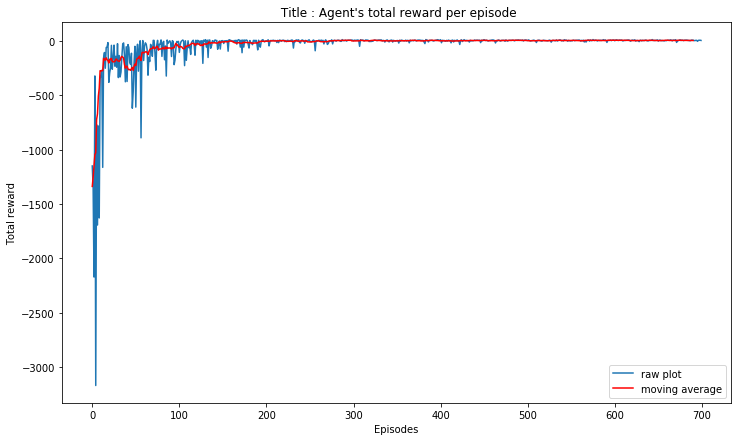

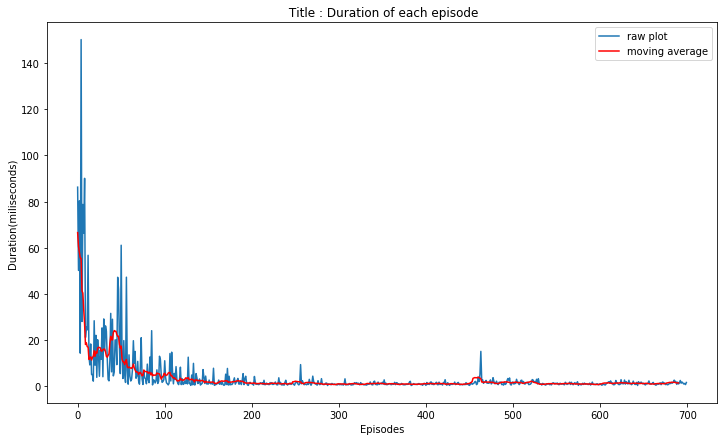

In [23]:
plot_performance_info(number_steps_per_episode, average_reward_per_episode,
                      maximum_q_value_per_episode, total_reward_per_episode,
                      episodes_durations, q_table_post_training)

In [24]:
print_frames(training_frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Episode: 697
Number Actions: 11
State: 16
Action: 5
Action Reward: 20
Total Reward: 9


<b> Question 5: </b> Can you think of a situation where softmax can outperform $\epsilon$-greedy? A situation where it is the opposite?